プロジェクトマネジメント: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '0', '0', '0', '0', '満点', '0', '0', '0', '0', '0']
基礎UML言語) (実データ): ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '0', '0', '0', '0']
Linux入門: ['0', '0', '満点', '0', '0', '0', '0', '満点', '0', '0', '満点', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '満点', '満点', '満点', '0', '0', '着手', '0', '満点']
アルゴリズム入門: ['0', '0', '0', '0', '0', '0', '0', '着手', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '0', '0', '着手', '0', '着手', '0', '0', '0', '0', '0']
基礎Javaプログラム言語: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '0', '0', '満点', '0', '着手', '着手', '0', '0', '0', '0']
クラウド・コンピューティング特論: ['0', '0', '満点', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '満点', '0', '満点', '0', '0', '0', '0', '0']
ネットワーク基礎技術: ['0', 

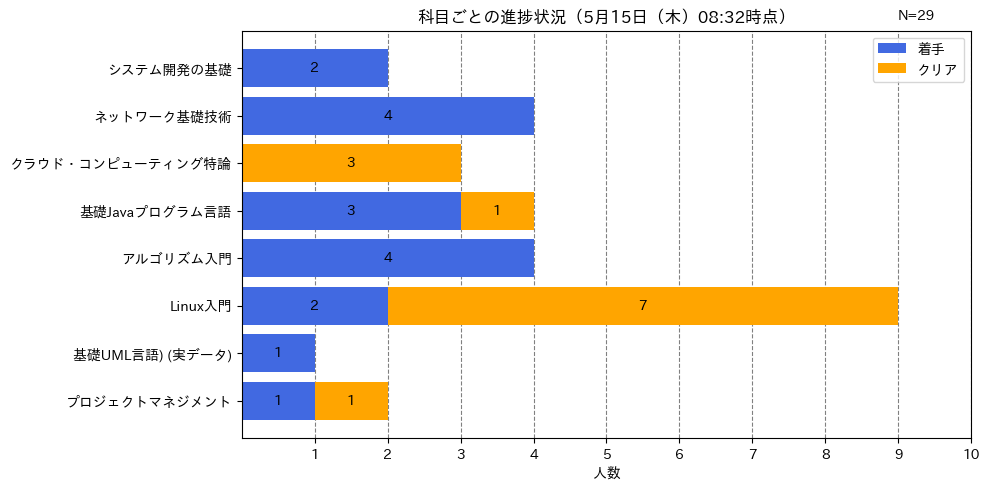

In [2]:
# 指定したフォルダのパスの中身のcsvファイルを結合したものをグラフ化してpng出力するプログラム
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import japanize_matplotlib
from zoneinfo import ZoneInfo  # Python 3.9以上

# 定数として定義
folder_path = '/home/jovyan/work/shared_downloads/Test/20250515'  #ここだけパスを自分で指定する必要がある
OUTPUT_DIR = "/home/jovyan/work/graph_image"
GROUP_NAME = "all group"
TOTAL_STUDENTS = 0


# CSVファイルの取得（フォルダの中身のcsvファイルの名前を配列で保存）
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
df_after_csv_files = []

# 各CSVファイルに対して処理
for csv_file in csv_files:
    CSV_PATH = os.path.join(folder_path, csv_file)
    try:
        # 元のCSVファイルを読み込む
        df = pd.read_csv(CSV_PATH)
        
        #残したい行を指定（グループの参加者を絞る）
        #自律性・有能感・関連性を支援したグループ
        rows_to_keep_group1 = [
            "g2125004@fun.ac.jp",
            "g2125007@fun.ac.jp",
            "g2125010@fun.ac.jp",
            "g2125013@fun.ac.jp",
            "g2125018@fun.ac.jp",
            "g2125023@fun.ac.jp",
            "g2125040@fun.ac.jp",
            "g2125057@fun.ac.jp",
            "g2125059@fun.ac.jp",
            "g2125069@fun.ac.jp"
        ]
        
        #何も支援してないグループ
        rows_to_keep_group2 = [
            "g2124004@fun.ac.jp",
            "g2125002@fun.ac.jp",
            "g2125022@fun.ac.jp",
            "g2125042@fun.ac.jp",
            "g2125051@fun.ac.jp",
            "g2125054@fun.ac.jp",
            "g2125056@fun.ac.jp",
            "g2125068@fun.ac.jp",
            "g2125071@fun.ac.jp"
        ]
        
        #自律性だけ支援したグループ
        rows_to_keep_group3 = [
            "g2125020@fun.ac.jp",
            "g2125021@fun.ac.jp",
            "g2125025@fun.ac.jp",
            "g2125035@fun.ac.jp",
            "g2125037@fun.ac.jp",
            "g2125038@fun.ac.jp",
            "g2125039@fun.ac.jp",
            "g2125041@fun.ac.jp",
            "g2125044@fun.ac.jp",
            "g2125055@fun.ac.jp"
        ]
        
        
        #keitest4: 自律性・有能感・関連性を支援したグループ1
        #keilabtest5: 何も支援してないグループ2
        #keilabtest7: 自律性だけ支援したグループ3
        
        
        # CSV_PATHに"keitest4"が含まれている場合
        if "keitest4" in CSV_PATH:
            # 'メールアドレス'列に基づいてフィルタリング（rows_to_keep_group1を使用）
            df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group1)]
            # GROUP_NAME = "Group1"
            TOTAL_STUDENTS += 10
        elif "keilabtest5" in CSV_PATH:
            # 'メールアドレス'列に基づいてフィルタリング（rows_to_keep_group2を使用）
            df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group2)]
            # GROUP_NAME = "Group2"
            TOTAL_STUDENTS += 9
        elif "keilabtest7" in CSV_PATH:
            # 'メールアドレス'列に基づいてフィルタリング（rows_to_keep_group2を使用）
            df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group3)]
            # GROUP_NAME = "Group3"
            TOTAL_STUDENTS += 10
        else :
            # CSV_PATHがおかしい場合はエラーメッセージを表示して強制終了
            print("エラー: CSV_PATHがおかしいです。'keitest4'が含まれていません。")
            exit()  # 強制終了
        
        # 結果を確認
        # print(df_filtered)
        
        
        # 残したい列だけを指定
        columns_to_keep = [
            "SCORMパッケージ:確認テスト（プロジェクトマネジメント） (実データ)",
            "SCORMパッケージ:確認テスト（基礎UML言語) (実データ)",
            "SCORMパッケージ:確認テスト（Linux入門） (実データ)",
            "SCORMパッケージ:確認テスト（アルゴリズム入門） (実データ)",
            "SCORMパッケージ:確認テスト（基礎Javaプログラム言語） (実データ)",
            "SCORMパッケージ:確認テスト（クラウド・コンピューティング特論） (実データ)",
            "小テスト:確認テスト（ネットワーク基礎技術） (実データ)",
            "小テスト:確認テスト（システム開発の基礎） (実データ)"
        ]
        
        # 列を抽出して新しいDataFrameを作成
        df_filtered = df_filtered[columns_to_keep]

        df_after_csv_files.append(df_filtered)
        
        # #成形済みCSVとして出力
        # df_filtered.to_csv("./data/output2.csv", index=False, encoding="utf-8-sig")
        # print(df_filtered)
        # print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")
        
    except Exception as e:
        print(f'{csv_file} の処理中にエラーが発生しました: {e}')



# すべてのdf_filteredを縦方向に結合（indexは無視）
df_all = pd.concat(df_after_csv_files, ignore_index=True)

# #成形済みCSVとして出力
# df_all.to_csv("./output_csv/output2.csv", index=False, encoding="utf-8-sig")
# print(df_filtered)
# print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")






        
#データをさらに整理する
# 点数を「未着手」「着手」「満点」に分類する関数
def classify_score(value):
    if value == '-' or pd.isna(value):
        return '0'
    try:
        score = float(value)
        if score == 100.0:
            return '満点'
        else:
            return '着手'
    except ValueError:
        return '0'


# 各列ごとに分類を行う
# - -> 0
# 1 ~ 99 -> 着手
# 100 ->満点
# 上記のようにデータを変換し、DataFrame型をオブジェクト型配列に変更して
# subjectData["プロジェクトマネジメント"] = ['0', '0', '0', '0', '0', '満点', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '着手', '0']
# 上のようなオブジェクト配列を科目分作成する

subjectData = {}
for column in df_all.columns:
    subject_name = column.split('（')[1].split('）')[0]  # 例: 「プロジェクトマネジメント」「基礎UM言語」
    subjectData[subject_name] = df_all[column].apply(classify_score).tolist()

# 結果表示
for subject, status_list in subjectData.items():
    print(f"{subject}: {status_list}")
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    






#さらにさらにデータを整理する
# 先ほど作成したオブジェクト配列を参考にして、「0（＝未着手）」のカウント、「満点」のカウント、「着手」のカウントを行い、
# プロジェクトマネジメント: {'着手': 0, '満点': 0, '未着手': 45}のようなオブジェクト配列を作成する
summary = {}

for subject, statuses in subjectData.items():
    count_0 = statuses.count('0')
    count_started = statuses.count('着手')
    count_full = statuses.count('満点')
    # 未着手＝0点（'0'）の数、ここでは count_0 としてそのまま使う
    summary[subject] = {
        # '0点': count_0,
        '着手': count_started,
        '満点': count_full,
        '未着手': count_0  # 0点を「未着手」と同義とするならこれでOK
    }

# 出力（例：見やすく整形）
for subject, counts in summary.items():
    print(f"{subject}: {counts}")
print(summary)
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    






#グラフ作成のための準備
# 各科目の着手+満点数をカウントし、最大値を求める(グラフのx軸の範囲で使う）
total_counts = {subject: data['着手'] + data['満点'] for subject, data in summary.items()}

# 最大値を取得
max_total = max(total_counts.values())

# # 結果表示
# print("各科目の（着手＋満点）:", total_counts)
# print("最大値:", max_total)

x_ticks = [] #x軸の間隔を保存する配列
for i in range(max_total+1) :
 x_ticks.append(i + 1)
#print(x_ticks)
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    





# グラフ用データ作成
subjects = list(summary.keys())
started = [summary[subject]['着手'] for subject in subjects]
perfect = [summary[subject]['満点'] for subject in subjects]

# グラフ描画
bar_width = 0.4
y_pos = range(len(subjects))

fig, ax = plt.subplots(figsize=(10, 5))  # ここで fig, ax を作成

# 積み上げ型棒グラフ（横向き）
ax.barh(y_pos, started, color='royalblue', label='着手')
ax.barh(y_pos, perfect, left=started, color='orange', label='クリア')

# 棒グラフの中に人数を描画
for i, (s, p) in enumerate(zip(started, perfect)):
    if s > 0:
        ax.text(s / 2, i, str(s), va='center', ha='center', color='black')
    if p > 0:
        ax.text(s + p / 2, i, str(p), va='center', ha='center', color='black')

# 軸とラベル
ax.set_yticks(y_pos)
ax.set_yticklabels(subjects)
ax.set_xlabel('人数')
ax.set_xticks(x_ticks)

# グリッドを後ろに描画する設定
ax.set_axisbelow(True)
# 縦の格子線だけ表示
ax.grid(axis='x', linestyle='--', color='gray')

# グラフの上に「N=●●」を表示（例えば右上）
total_students = TOTAL_STUDENTS  # 任意の科目のデータ数（＝全体の人数）
ax.text(
    0.95, 1.02, f'N={total_students}', 
    transform=ax.transAxes, ha='right', va='bottom',
    fontsize=10, fontweight='bold'
)

# 凡例表示
ax.legend(loc='upper right')
plt.tight_layout()





# 作成グラフを出力するためのコード
# JSTで現在時刻を取得
now_jst = datetime.datetime.now(ZoneInfo("Asia/Tokyo"))

# 日付と曜日（日本語）の取得
today = now_jst.date()
weekday_jp = ['月', '火', '水', '木', '金', '土', '日']  # 日本語の曜日リスト

# 日付＋時分の文字列（例：4月24日（水）14:35時点）
today_str = f'{today.month}月{today.day}日（{weekday_jp[today.weekday()]}）{now_jst.strftime("%H:%M")}時点'

# グラフタイトルに今日の日付と時刻を表示
ax.set_title(f'科目ごとの進捗状況（{today_str}）')
# ax.set_title(f'科目ごとの進捗状況（{today_str}）:{GROUP_NAME}')

# 保存用フォルダの作成（例：'20250424' のような形式）
date_folder_name = now_jst.strftime('%Y%m%d')
output_folder = os.path.join(OUTPUT_DIR, date_folder_name)

# フォルダがなければ作成
os.makedirs(output_folder, exist_ok=True)

# ファイル名に日付＋時刻（秒まで）を入れる
now_str = now_jst.strftime('%Y%m%d_%Hh-%Mm-%Ss')
output_path = os.path.join(output_folder, f"{GROUP_NAME}_image_{now_str}.png")

# 保存
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# 表示
plt.show()

